In [40]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout, MaxPooling2D
from tensorflow.keras.datasets import fashion_mnist

# 이미 훈련과 테스트가 분리된 데이터임
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [41]:
# 데이터의 크기 확인
# 28X28X1 = 흑백데이터다~
print("train",x_train.shape,y_train.shape)
print("test",x_test.shape,y_test.shape)

train (60000, 28, 28) (60000,)
test (10000, 28, 28) (10000,)


In [42]:
# 크기변경
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [43]:
# y의 클래스 보기
a,b = np.unique(y_train,return_counts=1)
# print(np.unique(y_train,return_counts=1))
print(a)
print(b)

[0 1 2 3 4 5 6 7 8 9]
[6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


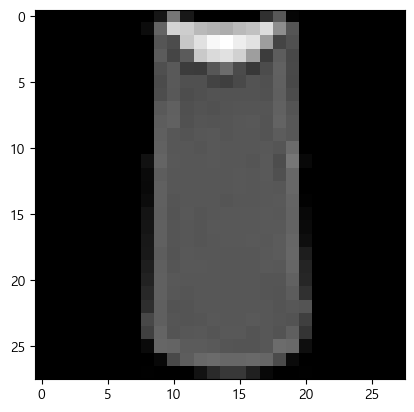

In [44]:
# 이미지 시각화
import matplotlib.pyplot as plt
plt.imshow(x_train[2],"gray")

In [48]:
# 모델
rate = 0.2
model = Sequential([
    # 5X5 이미지 채널 1개 
    # 필터 = output 노드수 
    # 자르는 필터는 2X2 사이즈 
    Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1),activation="relu"),
    Conv2D(filters=64,kernel_size=(3,3),activation="relu"),   
    MaxPooling2D(2,2),
    Conv2D(filters=128,kernel_size=(3,3),activation="relu"),
    Conv2D(filters=128,kernel_size=(3,3),activation="relu"),   
    MaxPooling2D(2,2),
    Conv2D(filters=256,kernel_size=(3,3),activation="relu"),
    Conv2D(filters=256,kernel_size=(3,3),activation="relu"), 
    # Conv2D(filters=256,kernel_size=(3,3),activation="relu"), 
    # MaxPooling2D(2,2),
    # Conv2D(filters=512,kernel_size=(3,3),activation="relu"),
    # Conv2D(filters=512,kernel_size=(3,3),activation="relu"), 
    # Conv2D(filters=512,kernel_size=(3,3),activation="relu"), 
    # MaxPooling2D(2,2),
    
    

     
    # 완전통합층에서는 falt + Flatten(),
    # Dense 의 인풋은 batch_size , input_dim
    Flatten(),
    Dense(16,activation="relu"),
    Dense(10,activation="softmax")
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 conv2d_48 (Conv2D)          (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 conv2d_50 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 4, 4, 128)        0         
 g2D)                                                

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["acc"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

earlyStopping = EarlyStopping(monitor="val_loss",
                              mode="min",patience =10,
                              # True 면 좋았던 웨이트로 복원됨
                              # False 면 마지막 웨이트로 놔둠..
                              restore_best_weights=True,
                              verbose=1                              
                              )
# 모델체크포인트는 가장 낮은 val_loss 가 갱신 될 떄 마다 저장합니다.

mcp = ModelCheckpoint(
    monitor="val_loss",
    mode="auto",
    save_best_only=True,
    filepath= "mnlist.h5",
    verbose=1 
)
                    

hist = model.fit(
                x_train,
                y_train,
                epochs=8,
                batch_size=64,
                validation_split=0.2,
                verbose=1,
                callbacks = [earlyStopping,mcp],      
                )

Epoch 1/8
750/750 [==============================] - ETA: 0s - loss: 1.6369 - acc: 0.4900
Epoch 00001: val_loss improved from inf to 0.73288, saving model to mnlist.h5
750/750 [==============================] - 5s 6ms/step - loss: 1.6369 - acc: 0.4900 - val_loss: 0.7329 - val_acc: 0.7042
Epoch 2/8
749/750 [============================>.] - ETA: 0s - loss: 0.7577 - acc: 0.7086
Epoch 00002: val_loss improved from 0.73288 to 0.56737, saving model to mnlist.h5
750/750 [==============================] - 4s 6ms/step - loss: 0.7574 - acc: 0.7087 - val_loss: 0.5674 - val_acc: 0.7918
Epoch 3/8
746/750 [============================>.] - ETA: 0s - loss: 0.6232 - acc: 0.7682
Epoch 00003: val_loss improved from 0.56737 to 0.50918, saving model to mnlist.h5
750/750 [==============================] - 4s 6ms/step - loss: 0.6231 - acc: 0.7682 - val_loss: 0.5092 - val_acc: 0.8160
Epoch 4/8
745/750 [============================>.] - ETA: 0s - loss: 0.5585 - acc: 0.7933
Epoch 00004: val_loss improved from

In [ ]:
loss,acc = model.evaluate(x_test,y_test)
print("loss : ",loss)
print("acc : ",acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.4313 - acc: 0.8415
loss :  0.43127182126045227
acc :  0.8414999842643738
